In [1]:
# Leer archivo csv, separado por ";"
headers = read.csv(file="output-2015-diarios.csv", header = F, nrows = 1, as.is = T)
df_dist1 = read.csv(file="output-2015-diarios.csv", skip = 2, header = F)
colnames(df_dist1)= headers
#df_dist1 <- read.csv(file="output-2015-diarios.csv", header=TRUE, skip=1, sep=",", stringsAsFactors=FALSE)


In [5]:
require(lubridate)
df_dist1$Hour <- as.numeric(df_dist1$Hour, units="hours")
df_dist1$Ndate <- as.Date((df_dist1$DoY+16436-1), origin="1970-01-01")
df_dist1$NHour <- format(as.POSIXct(Sys.Date()+df_dist1$Hour/24.0), "%H.%M", tz="UTC")
df_dist1$NewDate <- as.POSIXct(paste0(df_dist1$Ndate, df_dist1$NHour),format="%Y-%m-%d %H.%M")
df_dist1$NMonth <- factor(month(df_dist1$NewDate),
                         labels = c("Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"))
head(df_dist1)
str(df_dist1)

Year,DoY,Hour,NEE,qcNEE,LE,qcLE,H,qcH,Rg,⋯,Reco_U50,GPP_U50_f,GPP_U50_fqc,Reco_U95,GPP_U95_f,GPP_U95_fqc,Ndate,NHour,NewDate,NMonth
2015,1,0.5,1.65,1,61.83,1,-53.68,1,2.33,⋯,1.80258,0.1530,0,2.2163,0.353,1,2015-01-01,00.30,2015-01-01 00:30:00,Jan
2015,1,1.0,0.56,1,29.31,1,-24.63,1,0.33,⋯,1.70805,1.9093,1,2.1183,-0.232,1,2015-01-01,01.00,2015-01-01 01:00:00,Jan
2015,1,1.5,1.10,1,47.36,1,-35.20,1,0.00,⋯,1.68896,1.7601,1,2.0984,-0.252,1,2015-01-01,01.30,2015-01-01 01:30:00,Jan
2015,1,2.0,1.34,1,41.64,1,-51.72,1,0.00,⋯,1.62617,0.2860,0,2.0327,-0.317,1,2015-01-01,02.00,2015-01-01 02:00:00,Jan
2015,1,2.5,1.05,1,22.12,1,-40.12,1,0.00,⋯,1.53560,-0.4630,1,1.9371,-0.323,1,2015-01-01,02.30,2015-01-01 02:30:00,Jan
2015,1,3.0,0.91,1,17.25,1,-36.46,1,0.00,⋯,1.45370,-0.3410,1,1.8500,-0.266,1,2015-01-01,03.00,2015-01-01 03:00:00,Jan


'data.frame':	17523 obs. of  115 variables:
 $ Year         : int  2015 2015 2015 2015 2015 2015 2015 2015 2015 2015 ...
 $ DoY          : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Hour         : num  0.5 1 1.5 2 2.5 3 3.5 4 4.5 5 ...
 $ NEE          : num  1.65 0.56 1.1 1.34 1.05 0.91 2.11 1.58 1.77 1.52 ...
 $ qcNEE        : int  1 1 1 1 1 1 1 1 1 1 ...
 $ LE           : num  61.8 29.3 47.4 41.6 22.1 ...
 $ qcLE         : int  1 1 1 1 1 1 1 1 1 1 ...
 $ H            : num  -53.7 -24.6 -35.2 -51.7 -40.1 ...
 $ qcH          : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Rg           : num  2.33 0.33 0 0 0 0 0 0 0 0 ...
 $ Tair         : num  12.4 11.7 11.6 11.1 10.3 ...
 $ Tsoil        : num  14.2 14.2 14.2 14.3 14.3 ...
 $ rH           : num  44.8 45.6 45.1 43.5 44.1 ...
 $ VPD          : num  7.95 7.47 7.45 7.42 6.99 6.56 6.55 6.42 6.47 6.39 ...
 $ Ustar        : num  0.36 0.22 0.27 0.3 0.26 0.24 0.23 0.22 0.26 0.24 ...
 $ Ustar_Thres  : num  0.343 0.343 0.343 0.343 0.343 ...
 $ Ustar_fqc    : int  0 1 1 1

In [63]:
df0<- subset(df_dist1, select=c("DoY", "NewDate", "NMonth", "NEE_f",
                               "LE_f", "H_f", "Rg_f", 
                               "rH_f", "Tair_f", "Tsoil_f", "Reco", 
                               "GPP_f", "GPP_U05_f","GPP_U50_f", "GPP_U95_f"))
names(df0) <- c("DoY", "Date", "Month", "NEE",
               "LE", "H", "Rg",
               "rH", "Tair", "Tsoil", "Reco",
               "GPP", "GPP_U05", "GPP_U50", "GPP_U95")               
head(df0)
str(df0)

DoY,Date,Month,NEE,LE,H,Rg,rH,Tair,Tsoil,Reco,GPP,GPP_U05,GPP_U50,GPP_U95
1,2015-01-01 00:30:00,Jan,1.6500000,61.83,-53.7,2.33,44.76,12.43,14.16,1.93937,0.2890,-1.4726,0.1530,0.353
1,2015-01-01 01:00:00,Jan,-0.4214286,29.31,-24.6,0.33,45.57,11.70,14.20,1.83124,2.2527,-0.3940,1.9093,-0.232
1,2015-01-01 01:30:00,Jan,-0.2475000,47.36,-35.2,0.00,45.13,11.55,14.25,1.80945,2.0570,-0.9370,1.7601,-0.252
1,2015-01-01 02:00:00,Jan,-0.2475000,41.64,-51.7,0.00,43.53,11.05,14.29,1.73790,1.9854,-1.1842,0.2860,-0.317
1,2015-01-01 02:30:00,Jan,1.9912500,22.12,-40.1,0.00,44.14,10.31,14.32,1.63501,-0.3560,-0.9050,-0.4630,-0.323
1,2015-01-01 03:00:00,Jan,1.9766667,17.25,-36.5,0.00,45.10,9.62,14.36,1.54230,-0.4340,-0.7750,-0.3410,-0.266


'data.frame':	17523 obs. of  15 variables:
 $ DoY    : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Date   : POSIXct, format: "2015-01-01 00:30:00" "2015-01-01 01:00:00" ...
 $ Month  : Factor w/ 12 levels "Jan","Feb","Mar",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ NEE    : num  1.65 -0.421 -0.247 -0.247 1.991 ...
 $ LE     : num  61.8 29.3 47.4 41.6 22.1 ...
 $ H      : num  -53.7 -24.6 -35.2 -51.7 -40.1 -36.5 -53.6 -42.4 -53 -43.8 ...
 $ Rg     : num  2.33 0.33 0 0 0 0 0 0 0 0 ...
 $ rH     : num  44.8 45.6 45.1 43.5 44.1 ...
 $ Tair   : num  12.4 11.7 11.6 11.1 10.3 ...
 $ Tsoil  : num  14.2 14.2 14.2 14.3 14.3 ...
 $ Reco   : num  1.94 1.83 1.81 1.74 1.64 ...
 $ GPP    : num  0.289 2.253 2.057 1.985 -0.356 ...
 $ GPP_U05: num  -1.473 -0.394 -0.937 -1.184 -0.905 ...
 $ GPP_U50: num  0.153 1.909 1.76 0.286 -0.463 ...
 $ GPP_U95: num  0.353 -0.232 -0.252 -0.317 -0.323 -0.266 -0.317 -0.375 -0.402 -0.444 ...


In [64]:
df <- subset(df0, select=c("DoY", "Date", "Month", "NEE", "LE", "H", "Rg", "Reco", "GPP", "GPP_U05", "GPP_U50", "GPP_U95"))

In [65]:
df$Hour = strftime(df$Date, "%H:%M")
df$NHour <- as.POSIXct(strptime(df$Hour, "%H:%M"))
str(df)

'data.frame':	17523 obs. of  14 variables:
 $ DoY    : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Date   : POSIXct, format: "2015-01-01 00:30:00" "2015-01-01 01:00:00" ...
 $ Month  : Factor w/ 12 levels "Jan","Feb","Mar",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ NEE    : num  1.65 -0.421 -0.247 -0.247 1.991 ...
 $ LE     : num  61.8 29.3 47.4 41.6 22.1 ...
 $ H      : num  -53.7 -24.6 -35.2 -51.7 -40.1 -36.5 -53.6 -42.4 -53 -43.8 ...
 $ Rg     : num  2.33 0.33 0 0 0 0 0 0 0 0 ...
 $ Reco   : num  1.94 1.83 1.81 1.74 1.64 ...
 $ GPP    : num  0.289 2.253 2.057 1.985 -0.356 ...
 $ GPP_U05: num  -1.473 -0.394 -0.937 -1.184 -0.905 ...
 $ GPP_U50: num  0.153 1.909 1.76 0.286 -0.463 ...
 $ GPP_U95: num  0.353 -0.232 -0.252 -0.317 -0.323 -0.266 -0.317 -0.375 -0.402 -0.444 ...
 $ Hour   : chr  "00:30" "01:00" "01:30" "02:00" ...
 $ NHour  : POSIXct, format: "2018-05-28 00:30:00" "2018-05-28 01:00:00" ...


In [66]:
# One variable only
require(dplyr)
require(plyr)
dfJan <- filter(df, Month == 'Jan')
dfJan$Month <- NULL
dfFeb <- filter(df, Month == 'Feb')
dfFeb$Month <- NULL
dfMar <- filter(df, Month == 'Mar')
dfMar$Month <- NULL
dfApr <- filter(df, Month == 'Apr')
dfApr$Month <- NULL
dfMay <- filter(df, Month == 'May')
dfMay$Month <- NULL
dfJun <- filter(df, Month == 'Jun')
dfJun$Month <- NULL
dfJul <- filter(df, Month == 'Jul')
dfJul$Month <- NULL
dfAug<- filter(df, Month == 'Aug')
dfAug$Month <- NULL
dfSep<- filter(df, Month == 'Sep')
dfSep$Month <- NULL
dfOct<- filter(df, Month == 'Oct')
dfOct$Month <- NULL
dfNov<- filter(df, Month == 'Nov')
dfNov$Month <- NULL
dfDec<- filter(df, Month == 'Dec')
dfDec$Month <- NULL

In [67]:
summary(dfJan)

      DoY          Date                          NEE         
 Min.   : 1   Min.   :2015-01-01 00:00:00   Min.   :-48.760  
 1st Qu.: 8   1st Qu.:2015-01-08 17:52:30   1st Qu.: -5.200  
 Median :16   Median :2015-01-16 11:45:00   Median : -0.690  
 Mean   :16   Mean   :2015-01-16 11:45:00   Mean   : -1.688  
 3rd Qu.:24   3rd Qu.:2015-01-24 05:37:30   3rd Qu.:  1.847  
 Max.   :31   Max.   :2015-01-31 23:30:00   Max.   : 49.560  
       LE                 H                 Rg             Reco      
 Min.   :-188.810   Min.   :-469.00   Min.   :  0.0   Min.   :1.032  
 1st Qu.:  -1.975   1st Qu.: -11.00   1st Qu.:  0.0   1st Qu.:2.144  
 Median :   9.752   Median :  -1.18   Median :  0.0   Median :2.729  
 Mean   :  34.375   Mean   :  33.52   Mean   :139.6   Mean   :2.752  
 3rd Qu.:  68.200   3rd Qu.:  55.77   3rd Qu.:245.7   3rd Qu.:3.313  
 Max.   : 330.860   Max.   : 356.00   Max.   :765.7   Max.   :5.093  
      GPP              GPP_U05            GPP_U50            GPP_U95        

In [68]:
resJan <- dfJan %>% group_by(Hour) %>% summarise_all(funs(mean)) 
resJan <- data.frame(resJan)
resFeb <- dfFeb %>% group_by(Hour) %>% summarise_all(funs(mean)) 
resFeb <- data.frame(resFeb)
resMar <- dfMar %>% group_by(Hour) %>% summarise_all(funs(mean)) 
resMar <- data.frame(resMar)
resApr <- dfApr %>% group_by(Hour) %>% summarise_all(funs(mean)) 
resApr <- data.frame(resApr)
resMay <- dfMay %>% group_by(Hour) %>% summarise_all(funs(mean)) 
resMay <- data.frame(resMay)
resJun <- dfJun %>% group_by(Hour) %>% summarise_all(funs(mean)) 
resJun <- data.frame(resJun)
resJul <- dfJul %>% group_by(Hour) %>% summarise_all(funs(mean)) 
resJul <- data.frame(resJul)
resAug <- dfAug %>% group_by(Hour) %>% summarise_all(funs(mean)) 
resAug <- data.frame(resAug)
resSep <- dfSep %>% group_by(Hour) %>% summarise_all(funs(mean)) 
resSep <- data.frame(resSep)
resOct <- dfOct %>% group_by(Hour) %>% summarise_all(funs(mean)) 
resOct <- data.frame(resOct)
resNov <- dfNov %>% group_by(Hour) %>% summarise_all(funs(mean)) 
resNov <- data.frame(resNov)
resDec <- dfDec %>% group_by(Hour) %>% summarise_all(funs(mean)) 
resDec <- data.frame(resDec)

In [69]:

str(resJan)

'data.frame':	48 obs. of  13 variables:
 $ Hour   : chr  "00:00" "00:30" "01:00" "01:30" ...
 $ DoY    : num  16 16 16 16 16 16 16 16 16 16 ...
 $ Date   : POSIXct, format: "2015-01-16 00:00:00" "2015-01-16 00:30:00" ...
 $ NEE    : num  1.19536 1.51035 0.00257 2.16062 0.73359 ...
 $ LE     : num  1.46 4.13 3.81 10.91 2.01 ...
 $ H      : num  -5.56 -10.11 -12.95 -22.06 -12.03 ...
 $ Rg     : num  0 0.0752 0.0323 0.0213 0 ...
 $ Reco   : num  2.44 2.38 2.36 2.35 2.33 ...
 $ GPP    : num  1.242 0.87 2.361 0.187 1.599 ...
 $ GPP_U05: num  0.463 -1.392 0.255 -1.344 -0.122 ...
 $ GPP_U50: num  -0.422 -0.74 0.963 -1.206 0.313 ...
 $ GPP_U95: num  1.03 0.558 2.267 0.221 1.389 ...
 $ NHour  : POSIXct, format: "2018-05-28 00:00:00" "2018-05-28 00:30:00" ...


In [70]:
resJan$Month <- "Jan"
resFeb$Month <- "Feb"
resMar$Month <- "Mar"
resApr$Month <- "Apr"
resMay$Month <- "May"
resJun$Month <- "Jun"
resJul$Month <- "Jul"
resAug$Month <- "Aug"
resSep$Month <- "Sep"
resOct$Month <- "Oct"
resNov$Month <- "Nov"
resDec$Month <- "Dec"

In [71]:
resJan$NHour <- as.POSIXct(strptime(resJan$Hour, "%H:%M"))
str(resJan)

'data.frame':	48 obs. of  14 variables:
 $ Hour   : chr  "00:00" "00:30" "01:00" "01:30" ...
 $ DoY    : num  16 16 16 16 16 16 16 16 16 16 ...
 $ Date   : POSIXct, format: "2015-01-16 00:00:00" "2015-01-16 00:30:00" ...
 $ NEE    : num  1.19536 1.51035 0.00257 2.16062 0.73359 ...
 $ LE     : num  1.46 4.13 3.81 10.91 2.01 ...
 $ H      : num  -5.56 -10.11 -12.95 -22.06 -12.03 ...
 $ Rg     : num  0 0.0752 0.0323 0.0213 0 ...
 $ Reco   : num  2.44 2.38 2.36 2.35 2.33 ...
 $ GPP    : num  1.242 0.87 2.361 0.187 1.599 ...
 $ GPP_U05: num  0.463 -1.392 0.255 -1.344 -0.122 ...
 $ GPP_U50: num  -0.422 -0.74 0.963 -1.206 0.313 ...
 $ GPP_U95: num  1.03 0.558 2.267 0.221 1.389 ...
 $ NHour  : POSIXct, format: "2018-05-28 00:00:00" "2018-05-28 00:30:00" ...
 $ Month  : chr  "Jan" "Jan" "Jan" "Jan" ...


`geom_smooth()` using method = 'loess'
`geom_smooth()` using method = 'loess'
`geom_smooth()` using method = 'loess'
`geom_smooth()` using method = 'loess'
`geom_smooth()` using method = 'loess'
`geom_smooth()` using method = 'loess'
`geom_smooth()` using method = 'loess'
`geom_smooth()` using method = 'loess'
`geom_smooth()` using method = 'loess'
`geom_smooth()` using method = 'loess'
`geom_smooth()` using method = 'loess'
`geom_smooth()` using method = 'loess'


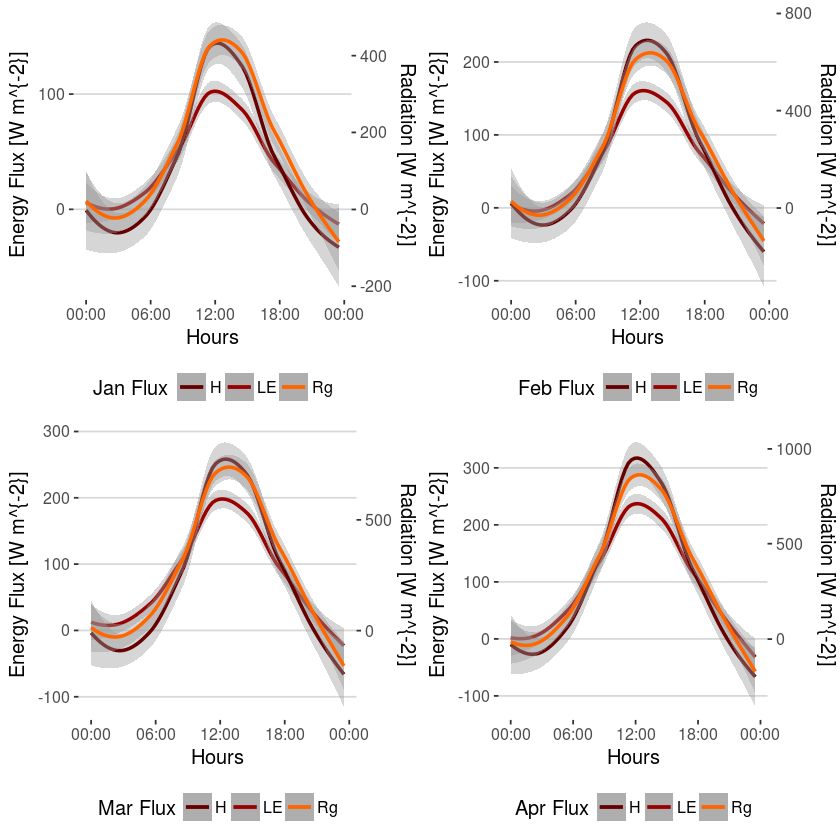

In [72]:
require(scales)
require(ggpubr)
require(gridExtra)
require(ggthemes)


p1 <- ggplot(resJan, aes(x = NHour, group = 1)) + theme_hc() 
  p1 <- p1 + geom_smooth(aes(y = LE, colour = "LE"))
  p1 <- p1 + geom_smooth(aes(y = H, colour = "H"))
  p1 <- p1 + geom_smooth(aes(y = Rg/3, colour = "Rg")) 
       
  
  # now adding the secondary axis, following the example in the help file ?scale_y_continuous
  # and, very important, reverting the above transformation
  p1 <- p1 + scale_y_continuous(sec.axis = sec_axis(~.*3, name = "Radiation [W m^{-2}]"))
 
  # modifying colours and theme options
  p1 <- p1 + scale_colour_manual(values = c("#660000", "#990000", "#FF6600"))
  p1 <- p1 + labs(y = "Energy Flux [W m^{-2}]",
                x = "Hours",
                colour = "Jan Flux") +
          scale_x_datetime(labels = date_format("%H:%M", tz = "America/Phoenix")) 
         
#p1

p2 <- ggplot(resFeb, aes(x = NHour, group = 1)) + theme_hc()
  p2 <- p2 + geom_smooth(aes(y = LE, colour = "LE"))
  p2 <- p2 + geom_smooth(aes(y = H, colour = "H"))
  p2 <- p2 + geom_smooth(aes(y = Rg/3, colour = "Rg")) 
  
  # now adding the secondary axis, following the example in the help file ?scale_y_continuous
  # and, very important, reverting the above transformation
  p2 <- p2 + scale_y_continuous(sec.axis = sec_axis(~.*3, name = "Radiation [W m^{-2}]"))
  # modifying colours and theme options
  p2 <- p2 + scale_colour_manual(values = c("#660000", "#990000", "#FF6600"))
  p2 <- p2 + labs(y = "Energy Flux [W m^{-2}]",
                x = "Hours",
                colour = "Feb Flux") +
          scale_x_datetime(labels = date_format("%H:%M", tz = "America/Phoenix"))

#p2


p3 <- ggplot(resMar, aes(x = NHour, group = 1)) + theme_hc()
  p3 <- p3 + geom_smooth(aes(y = LE, colour = "LE"))
  p3 <- p3 + geom_smooth(aes(y = H, colour = "H"))
  p3 <- p3 + geom_smooth(aes(y = Rg/3, colour = "Rg")) 
  
  # now adding the secondary axis, following the example in the help file ?scale_y_continuous
  # and, very important, reverting the above transformation
  p3 <- p3 + scale_y_continuous(sec.axis = sec_axis(~.*3, name = "Radiation [W m^{-2}]"))
  # modifying colours and theme options
  p3 <- p3 + scale_colour_manual(values = c("#660000", "#990000", "#FF6600"))
  p3 <- p3 + labs(y = "Energy Flux [W m^{-2}]",
                x = "Hours",
                colour = "Mar Flux") +
          scale_x_datetime(labels = date_format("%H:%M", tz = "America/Phoenix"))

# p3

p4 <- ggplot(resApr, aes(x = NHour, group = 1)) + theme_hc() 
  p4 <- p4 + geom_smooth(aes(y = LE, colour = "LE"))
  p4 <- p4 + geom_smooth(aes(y = H, colour = "H"))
  p4 <- p4 + geom_smooth(aes(y = Rg/3, colour = "Rg")) 
  
  # now adding the secondary axis, following the example in the help file ?scale_y_continuous
  # and, very important, reverting the above transformation
  p4 <- p4 + scale_y_continuous(sec.axis = sec_axis(~.*3, name = "Radiation [W m^{-2}]"))
  # modifying colours and theme options
  p4 <- p4 + scale_colour_manual(values = c("#660000", "#990000", "#FF6600"))
  p4 <- p4 + labs(y = "Energy Flux [W m^{-2}]",
                x = "Hours",
                colour = "Apr Flux") +
          scale_x_datetime(labels = date_format("%H:%M", tz = "America/Phoenix"))

#p4


grid.arrange(p1, p2, p3, p4, nrow = 2)


`geom_smooth()` using method = 'loess'
`geom_smooth()` using method = 'loess'
`geom_smooth()` using method = 'loess'
`geom_smooth()` using method = 'loess'
`geom_smooth()` using method = 'loess'
`geom_smooth()` using method = 'loess'
`geom_smooth()` using method = 'loess'
`geom_smooth()` using method = 'loess'
`geom_smooth()` using method = 'loess'
`geom_smooth()` using method = 'loess'
`geom_smooth()` using method = 'loess'
`geom_smooth()` using method = 'loess'


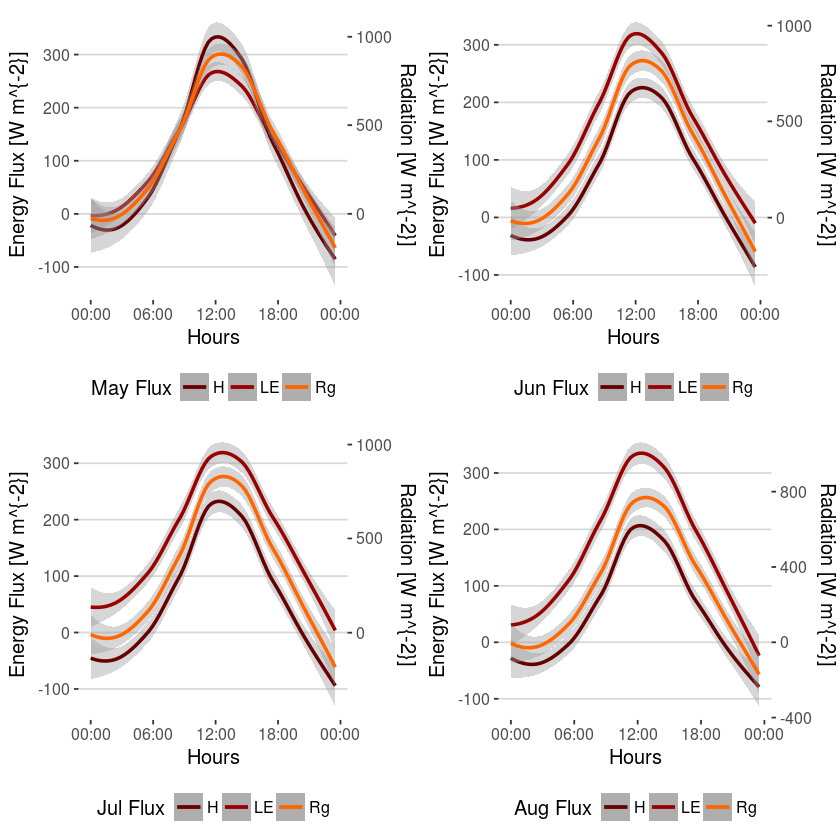

In [14]:
p5 <- ggplot(resMay, aes(x = NHour, group = 1)) + theme_hc()
  p5 <- p5 + geom_smooth(aes(y = LE, colour = "LE"))
  p5 <- p5 + geom_smooth(aes(y = H, colour = "H"))
  p5 <- p5 + geom_smooth(aes(y = Rg/3, colour = "Rg")) 
  
  # now adding the secondary axis, following the example in the help file ?scale_y_continuous
  # and, very important, reverting the above transformation
  p5 <- p5 + scale_y_continuous(sec.axis = sec_axis(~.*3, name = "Radiation [W m^{-2}]"))
  # modifying colours and theme options
  p5 <- p5 + scale_colour_manual(values = c("#660000", "#990000", "#FF6600"))
  p5 <- p5 + labs(y = "Energy Flux [W m^{-2}]",
                x = "Hours",
                colour = "May Flux") +
          scale_x_datetime(labels = date_format("%H:%M", tz = "America/Phoenix"))

#p5

  p6 <- ggplot(resJun, aes(x = NHour, group = 1)) + theme_hc()
  p6 <- p6 + geom_smooth(aes(y = LE, colour = "LE"))
  p6 <- p6 + geom_smooth(aes(y = H, colour = "H"))
  p6 <- p6 + geom_smooth(aes(y = Rg/3, colour = "Rg")) 
  
  # now adding the secondary axis, following the example in the help file ?scale_y_continuous
  # and, very important, reverting the above transformation
  p6 <- p6 + scale_y_continuous(sec.axis = sec_axis(~.*3, name = "Radiation [W m^{-2}]"))
  # modifying colours and theme options
  p6 <- p6 + scale_colour_manual(values = c("#660000", "#990000", "#FF6600"))
  p6 <- p6 + labs(y = "Energy Flux [W m^{-2}]",
                x = "Hours",
                colour = "Jun Flux") +
          scale_x_datetime(labels = date_format("%H:%M", tz = "America/Phoenix"))

#p6

  p7 <- ggplot(resJul, aes(x = NHour, group = 1)) + theme_hc()
  p7 <- p7 + geom_smooth(aes(y = LE, colour = "LE"))
  p7 <- p7 + geom_smooth(aes(y = H, colour = "H"))
  p7 <- p7 + geom_smooth(aes(y = Rg/3, colour = "Rg")) 
  
  # now adding the secondary axis, following the example in the help file ?scale_y_continuous
  # and, very important, reverting the above transformation
  p7 <- p7 + scale_y_continuous(sec.axis = sec_axis(~.*3, name = "Radiation [W m^{-2}]"))
  # modifying colours and theme options
  p7 <- p7 + scale_colour_manual(values = c("#660000", "#990000", "#FF6600"))
  p7 <- p7 + labs(y = "Energy Flux [W m^{-2}]",
                x = "Hours",
                colour = "Jul Flux") +
          scale_x_datetime(labels = date_format("%H:%M", tz = "America/Phoenix"))

#p7

  p8 <- ggplot(resAug, aes(x = NHour, group = 1)) + theme_hc()
  p8 <- p8 + geom_smooth(aes(y = LE, colour = "LE"))
  p8 <- p8 + geom_smooth(aes(y = H, colour = "H"))
  p8 <- p8 + geom_smooth(aes(y = Rg/3, colour = "Rg")) 
  
  # now adding the secondary axis, following the example in the help file ?scale_y_continuous
  # and, very important, reverting the above transformation
  p8 <- p8 + scale_y_continuous(sec.axis = sec_axis(~.*3, name = "Radiation [W m^{-2}]"))
  # modifying colours and theme options
  p8 <- p8 + scale_colour_manual(values = c("#660000", "#990000", "#FF6600"))
  p8<- p8 + labs(y = "Energy Flux [W m^{-2}]",
                x = "Hours",
                colour = "Aug Flux") +
          scale_x_datetime(labels = date_format("%H:%M", tz = "America/Phoenix"))

#p8

grid.arrange(p5, p6, p7, p8, nrow = 2)

`geom_smooth()` using method = 'loess'
`geom_smooth()` using method = 'loess'
`geom_smooth()` using method = 'loess'
`geom_smooth()` using method = 'loess'
`geom_smooth()` using method = 'loess'
`geom_smooth()` using method = 'loess'
`geom_smooth()` using method = 'loess'
`geom_smooth()` using method = 'loess'
`geom_smooth()` using method = 'loess'
`geom_smooth()` using method = 'loess'
`geom_smooth()` using method = 'loess'
`geom_smooth()` using method = 'loess'


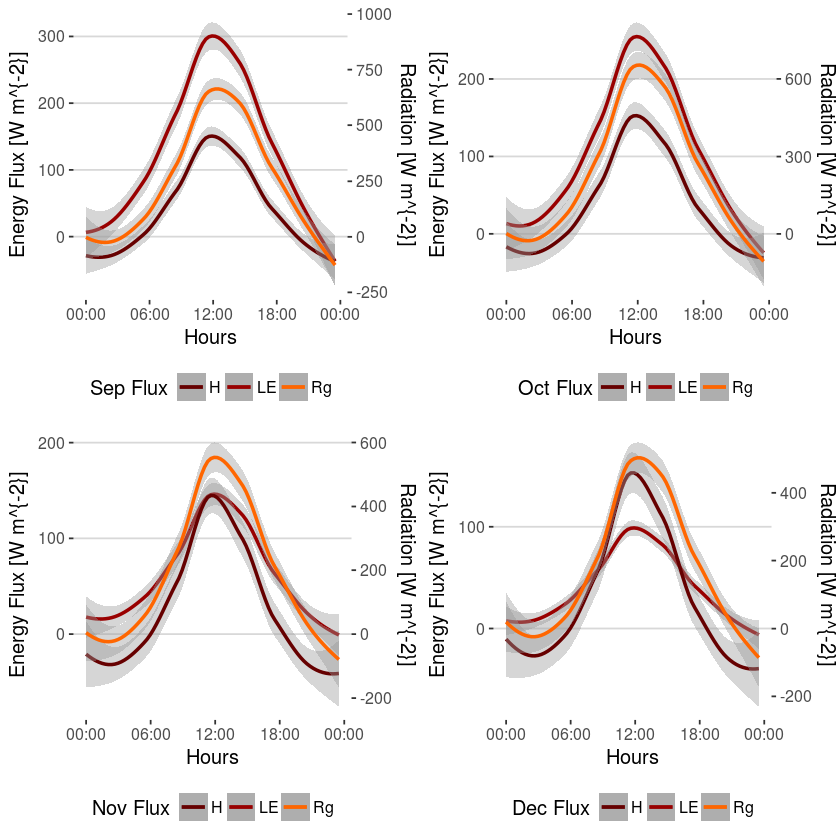

In [15]:
p9 <- ggplot(resSep, aes(x = NHour, group = 1)) + theme_hc()
  p9 <- p9 + geom_smooth(aes(y = LE, colour = "LE"))
  p9 <- p9 + geom_smooth(aes(y = H, colour = "H"))
  p9 <- p9 + geom_smooth(aes(y = Rg/3, colour = "Rg")) 
  
  # now adding the secondary axis, following the example in the help file ?scale_y_continuous
  # and, very important, reverting the above transformation
  p9 <- p9 + scale_y_continuous(sec.axis = sec_axis(~.*3, name = "Radiation [W m^{-2}]"))
  # modifying colours and theme options
  p9 <- p9 + scale_colour_manual(values = c("#660000", "#990000", "#FF6600"))
  p9 <- p9 + labs(y = "Energy Flux [W m^{-2}]",
                x = "Hours",
                colour = "Sep Flux") +
          scale_x_datetime(labels = date_format("%H:%M", tz = "America/Phoenix"))

#p9

  p10 <- ggplot(resOct, aes(x = NHour, group = 1)) + theme_hc()
  p10 <- p10 + geom_smooth(aes(y = LE, colour = "LE"))
  p10 <- p10 + geom_smooth(aes(y = H, colour = "H"))
  p10 <- p10 + geom_smooth(aes(y = Rg/3, colour = "Rg")) 
  
  # now adding the secondary axis, following the example in the help file ?scale_y_continuous
  # and, very important, reverting the above transformation
  p10 <- p10 + scale_y_continuous(sec.axis = sec_axis(~.*3, name = "Radiation [W m^{-2}]"))
  # modifying colours and theme options
  p10 <- p10 + scale_colour_manual(values = c("#660000", "#990000", "#FF6600"))
  p10 <- p10 + labs(y = "Energy Flux [W m^{-2}]",
                x = "Hours",
                colour = "Oct Flux") +
          scale_x_datetime(labels = date_format("%H:%M", tz = "America/Phoenix"))

#p10

  p11 <- ggplot(resNov, aes(x = NHour, group = 1)) + theme_hc()
  p11 <- p11 + geom_smooth(aes(y = LE, colour = "LE"))
  p11 <- p11 + geom_smooth(aes(y = H, colour = "H"))
  p11 <- p11 + geom_smooth(aes(y = Rg/3, colour = "Rg")) 
  
  # now adding the secondary axis, following the example in the help file ?scale_y_continuous
  # and, very important, reverting the above transformation
  p11 <- p11 + scale_y_continuous(sec.axis = sec_axis(~.*3, name = "Radiation [W m^{-2}]"))
  # modifying colours and theme options
  p11 <- p11 + scale_colour_manual(values = c("#660000", "#990000", "#FF6600"))
  p11 <- p11 + labs(y = "Energy Flux [W m^{-2}]",
                x = "Hours",
                colour = "Nov Flux") +
          scale_x_datetime(labels = date_format("%H:%M", tz = "America/Phoenix"))

#p11

  p12 <- ggplot(resDec, aes(x = NHour, group = 1)) + theme_hc()
  p12 <- p12 + geom_smooth(aes(y = LE, colour = "LE"))
  p12 <- p12 + geom_smooth(aes(y = H, colour = "H"))
  p12 <- p12 + geom_smooth(aes(y = Rg/3, colour = "Rg")) 
  
  # now adding the secondary axis, following the example in the help file ?scale_y_continuous
  # and, very important, reverting the above transformation
  p12 <- p12 + scale_y_continuous(sec.axis = sec_axis(~.*3, name = "Radiation [W m^{-2}]"))
  # modifying colours and theme options
  p12 <- p12 + scale_colour_manual(values = c("#660000", "#990000", "#FF6600"))
  p12 <- p12 + labs(y = "Energy Flux [W m^{-2}]",
                x = "Hours",
                colour = "Dec Flux") +
          scale_x_datetime(labels = date_format("%H:%M", tz = "America/Phoenix"))

#p8

grid.arrange(p9, p10, p11, p12, nrow = 2)

In [73]:
tail(resJan)

,Hour,DoY,Date,NEE,LE,H,Rg,Reco,GPP,GPP_U05,GPP_U50,GPP_U95,NHour,Month
43,21:00,16,2015-01-16 21:00:00,1.3274063,1.4902698,-8.350045,0.00000000,2.652451,1.3250677,0.89346129,-0.1477423,1.0422806,2018-05-28 21:00:00,Jan
44,21:30,16,2015-01-16 21:30:00,1.8132867,0.7239938,-12.283761,0.00000000,2.669225,0.8545258,-0.18044194,-0.5696013,0.6942548,2018-05-28 21:30:00,Jan
45,22:00,16,2015-01-16 22:00:00,0.7672393,6.1376975,-15.199194,0.00000000,2.601657,1.8344452,-1.71013226,0.2887448,1.7099548,2018-05-28 22:00:00,Jan
46,22:30,16,2015-01-16 22:30:00,0.2712666,-1.2344856,-12.156087,0.00000000,2.538336,2.2677645,0.84038387,0.6386806,2.0281903,2018-05-28 22:30:00,Jan
47,23:00,16,2015-01-16 23:00:00,1.3256146,0.1115344,-10.935939,0.00000000,2.537924,1.2135129,-0.19516452,-0.2814190,1.2963516,2018-05-28 23:00:00,Jan
48,23:30,16,2015-01-16 23:30:00,1.4975689,3.7986223,-8.445661,0.01064516,2.506387,1.0076032,0.05073871,-0.4627097,1.1794710,2018-05-28 23:30:00,Jan


In [74]:
fullres <- rbind(resJan, resFeb, resMar, resApr, resMay, resJun, resJul, resAug, resSep, resOct, resNov, resDec)
str(fullres)
summary(fullres)

'data.frame':	576 obs. of  14 variables:
 $ Hour   : chr  "00:00" "00:30" "01:00" "01:30" ...
 $ DoY    : num  16 16 16 16 16 16 16 16 16 16 ...
 $ Date   : POSIXct, format: "2015-01-16 00:00:00" "2015-01-16 00:30:00" ...
 $ NEE    : num  1.19536 1.51035 0.00257 2.16062 0.73359 ...
 $ LE     : num  1.46 4.13 3.81 10.91 2.01 ...
 $ H      : num  -5.56 -10.11 -12.95 -22.06 -12.03 ...
 $ Rg     : num  0 0.0752 0.0323 0.0213 0 ...
 $ Reco   : num  2.44 2.38 2.36 2.35 2.33 ...
 $ GPP    : num  1.242 0.87 2.361 0.187 1.599 ...
 $ GPP_U05: num  0.463 -1.392 0.255 -1.344 -0.122 ...
 $ GPP_U50: num  -0.422 -0.74 0.963 -1.206 0.313 ...
 $ GPP_U95: num  1.03 0.558 2.267 0.221 1.389 ...
 $ NHour  : POSIXct, format: "2018-05-28 00:00:00" "2018-05-28 00:30:00" ...
 $ Month  : chr  "Jan" "Jan" "Jan" "Jan" ...


     Hour                DoY              Date                    
 Length:576         Min.   : 16.00   Min.   :2015-01-16 00:00:00  
 Class :character   1st Qu.: 97.88   1st Qu.:2015-04-08 02:52:30  
 Mode  :character   Median :181.75   Median :2015-07-01 05:45:00  
                    Mean   :182.21   Mean   :2015-07-01 16:45:00  
                    3rd Qu.:266.12   3rd Qu.:2015-09-23 20:37:30  
                    Max.   :350.00   Max.   :2015-12-16 23:30:00  
      NEE                 LE               H                Rg          
 Min.   :-15.5717   Min.   :-12.10   Min.   :-57.17   Min.   :  0.0000  
 1st Qu.: -8.5984   1st Qu.: 14.07   1st Qu.:-22.61   1st Qu.:  0.0213  
 Median :  0.5808   Median : 48.64   Median :-11.54   Median : 11.3730  
 Mean   : -2.2014   Mean   : 94.55   Mean   : 52.75   Mean   :239.5136  
 3rd Qu.:  2.8142   3rd Qu.:162.63   3rd Qu.:130.82   3rd Qu.:510.5666  
 Max.   :  7.7296   Max.   :349.31   Max.   :382.37   Max.   :972.9355  
      Reco          

In [75]:
months <- c("Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec")
months = factor(months,levels=c("Jan","Feb","Mar",
              "Apr","May","Jun","Jul","Aug","Sep",
              "Oct","Nov","Dec"),ordered=TRUE)
str(months)

 Ord.factor w/ 12 levels "Jan"<"Feb"<"Mar"<..: 1 2 3 4 5 6 7 8 9 10 ...


In [76]:
require(dplyr) # or library("tidyverse")
#fullres <- fullres %>% mutate(id = row_number())
fullres$ID <- seq.int(nrow(fullres))
head(fullres)
str(fullres)

Hour,DoY,Date,NEE,LE,H,Rg,Reco,GPP,GPP_U05,GPP_U50,GPP_U95,NHour,Month,ID
00:00,16,2015-01-16 00:00:00,1.195360397,1.455789,-5.557045,0.00000000,2.438078,1.2415839,0.46251290,-0.4222935,1.0301258,2018-05-28 00:00:00,Jan,1
00:30,16,2015-01-16 00:30:00,1.510353487,4.130209,-10.105342,0.07516129,2.381793,0.8698097,-1.39162903,-0.7399516,0.5580645,2018-05-28 00:30:00,Jan,2
01:00,16,2015-01-16 01:00:00,0.002565629,3.813279,-12.952048,0.03225806,2.363583,2.3610935,0.25515484,0.9634161,2.2672355,2018-05-28 01:00:00,Jan,3
01:30,16,2015-01-16 01:30:00,2.160618490,10.912977,-22.061581,0.02129032,2.346873,0.1873548,-1.34400323,-1.2064723,0.2211452,2018-05-28 01:30:00,Jan,4
02:00,16,2015-01-16 02:00:00,0.733588271,2.010547,-12.025410,0.00000000,2.332967,1.5993355,-0.12182581,0.3131545,1.3887774,2018-05-28 02:00:00,Jan,5
02:30,16,2015-01-16 02:30:00,0.346971155,12.666134,-10.632858,0.01064516,2.308106,1.9620323,-0.08623871,0.3161935,1.6602548,2018-05-28 02:30:00,Jan,6


'data.frame':	576 obs. of  15 variables:
 $ Hour   : chr  "00:00" "00:30" "01:00" "01:30" ...
 $ DoY    : num  16 16 16 16 16 16 16 16 16 16 ...
 $ Date   : POSIXct, format: "2015-01-16 00:00:00" "2015-01-16 00:30:00" ...
 $ NEE    : num  1.19536 1.51035 0.00257 2.16062 0.73359 ...
 $ LE     : num  1.46 4.13 3.81 10.91 2.01 ...
 $ H      : num  -5.56 -10.11 -12.95 -22.06 -12.03 ...
 $ Rg     : num  0 0.0752 0.0323 0.0213 0 ...
 $ Reco   : num  2.44 2.38 2.36 2.35 2.33 ...
 $ GPP    : num  1.242 0.87 2.361 0.187 1.599 ...
 $ GPP_U05: num  0.463 -1.392 0.255 -1.344 -0.122 ...
 $ GPP_U50: num  -0.422 -0.74 0.963 -1.206 0.313 ...
 $ GPP_U95: num  1.03 0.558 2.267 0.221 1.389 ...
 $ NHour  : POSIXct, format: "2018-05-28 00:00:00" "2018-05-28 00:30:00" ...
 $ Month  : chr  "Jan" "Jan" "Jan" "Jan" ...
 $ ID     : int  1 2 3 4 5 6 7 8 9 10 ...


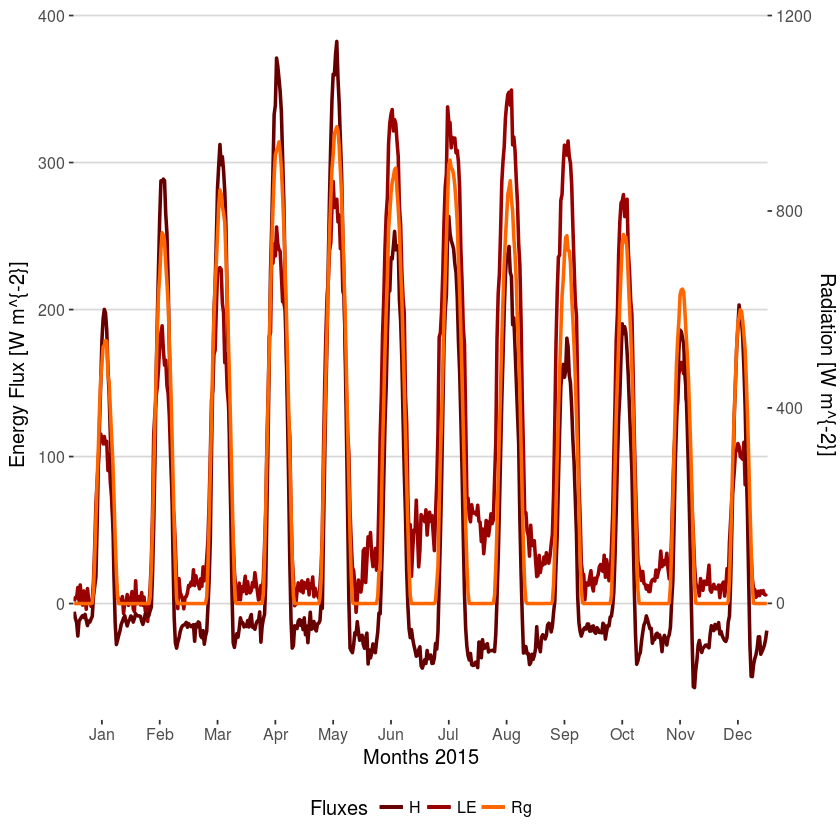

In [77]:

p <- ggplot(fullres, aes(x=factor(ID),group = 1)) + theme_hc() 
  p <- p + geom_line(aes(y = LE, colour = "LE"), size=1)
  p <- p + geom_line(aes(y = H, colour = "H"), size=1)
  p <- p + geom_line(aes(y = Rg/3, colour = "Rg"), size=1) 
       
  
  # now adding the secondary axis, following the example in the help file ?scale_y_continuous
  # and, very important, reverting the above transformation
  p <- p + scale_y_continuous(sec.axis = sec_axis(~.*3, name = "Radiation [W m^{-2}]"))
 
  # modifying colours and theme options
  p <- p + scale_colour_manual(values = c("#660000", "#990000", "#FF6600"))
  p <- p + labs(y = "Energy Flux [W m^{-2}]", x = "Months 2015", colour = "Fluxes") +
       scale_x_discrete(breaks=c(24,72,120,168,216,264, 312, 360, 408, 456,504,552), 
                        labels=c("Jan", "Feb", "Mar", "Apr", "May", "Jun", 
                                 "Jul", "Aug", "Sep", "Oct", "Nov", "Dec")) 
                     #   xlab("Months 2015") + ylab("Energy Fluxes [W m^{-2}]")
      #  scale_x_datetime(date_format("%Y-%m-%d", tz = "America/Phoenix")) + theme_hc()
         
p

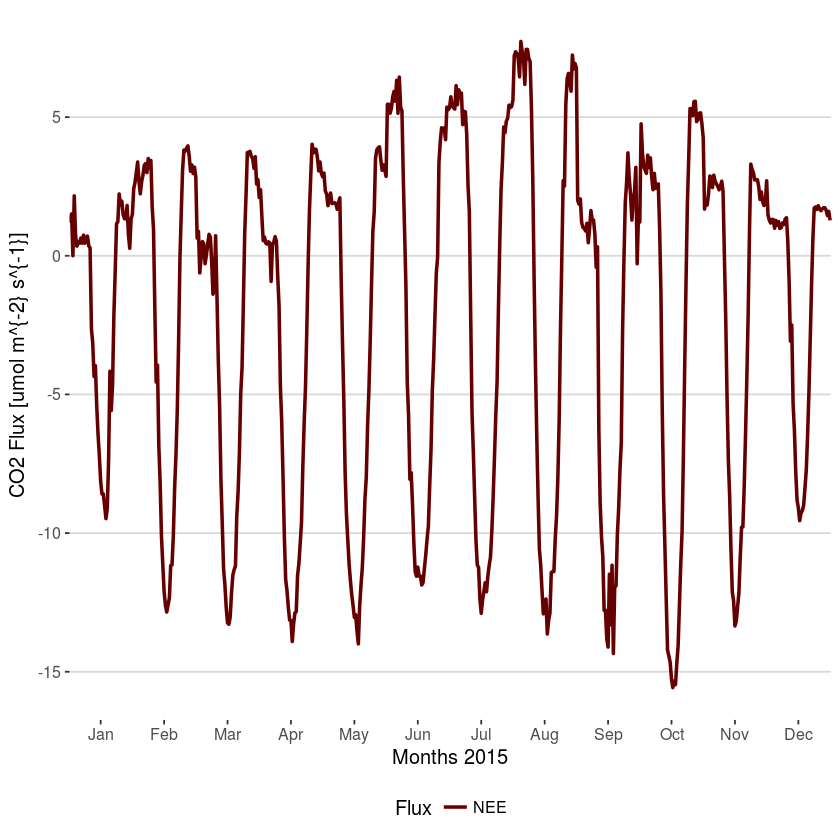

In [26]:
q <- ggplot(fullres, aes(x=factor(ID),group = 1)) + theme_hc() 
  q <- q + geom_line(aes(y = NEE, colour = "NEE"), size=1)
  
  
  # now adding the secondary axis, following the example in the help file ?scale_y_continuous
  # and, very important, reverting the above transformation
  #p <- p + scale_y_continuous(sec.axis = sec_axis(~.*3, name = "Radiation [W m^{-2}]"))
 
  # modifying colours and theme options
  q <- q + scale_colour_manual(values = c("#660000"))
  q <- q + labs(y = "CO2 Flux [umol m^{-2} s^{-1}]", x = "Months 2015", colour = "Flux") +
       scale_x_discrete(breaks=c(24,72,120,168,216,264, 312, 360, 408, 456,504,552), 
                        labels=c("Jan", "Feb", "Mar", "Apr", "May", "Jun", 
                                 "Jul", "Aug", "Sep", "Oct", "Nov", "Dec")) 
                     #   xlab("Months 2015") + ylab("Energy Fluxes [W m^{-2}]")
      #  scale_x_datetime(date_format("%Y-%m-%d", tz = "America/Phoenix")) + theme_hc()
         
q

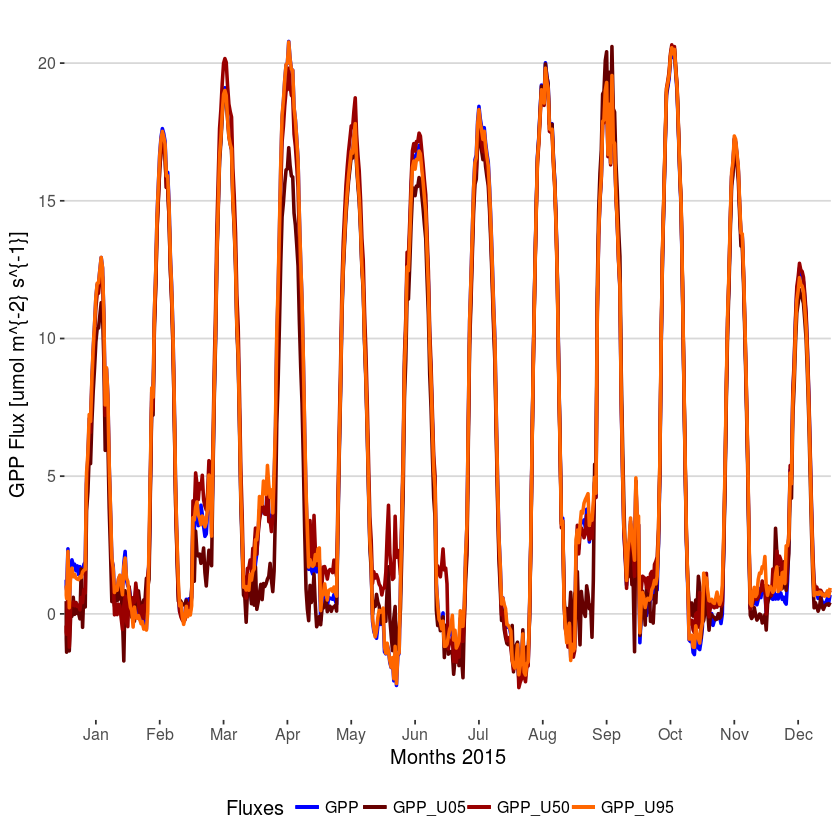

In [41]:
pp <- ggplot(fullres, aes(x=factor(ID),group = 1)) + theme_hc() 
  pp <- pp + geom_line(aes(y = GPP, colour = "GPP"), size=1)
  pp <- pp + geom_line(aes(y = GPP_U05, colour = "GPP_U05"), size=1)
  pp <- pp + geom_line(aes(y = GPP_U50, colour = "GPP_U50"), size=1) 
  pp <- pp + geom_line(aes(y = GPP_U95, colour = "GPP_U95"), size=1)
       
  
  # now adding the secondary axis, following the example in the help file ?scale_y_continuous
  # and, very important, reverting the above transformation
  #p <- p + scale_y_continuous(sec.axis = sec_axis(~.*3, name = "Radiation [W m^{-2}]"))
 
  # modifying colours and theme options
  pp <- pp + scale_colour_manual(values = c("blue", "#660000", "#990000", "#FF6600"))
  pp <- pp + labs(y = "GPP Flux [umol m^{-2} s^{-1}]", x = "Months 2015", colour = "Fluxes") +
       scale_x_discrete(breaks=c(24,72,120,168,216,264, 312, 360, 408, 456,504,552), 
                        labels=c("Jan", "Feb", "Mar", "Apr", "May", "Jun", 
                                 "Jul", "Aug", "Sep", "Oct", "Nov", "Dec")) 
                     #   xlab("Months 2015") + ylab("Energy Fluxes [W m^{-2}]")
      #  scale_x_datetime(date_format("%Y-%m-%d", tz = "America/Phoenix")) + theme_hc()
         
pp

Warning message:
“Removed 2 rows containing missing values (geom_path).”

Warning message:
“Removed 2 rows containing missing values (geom_path).”

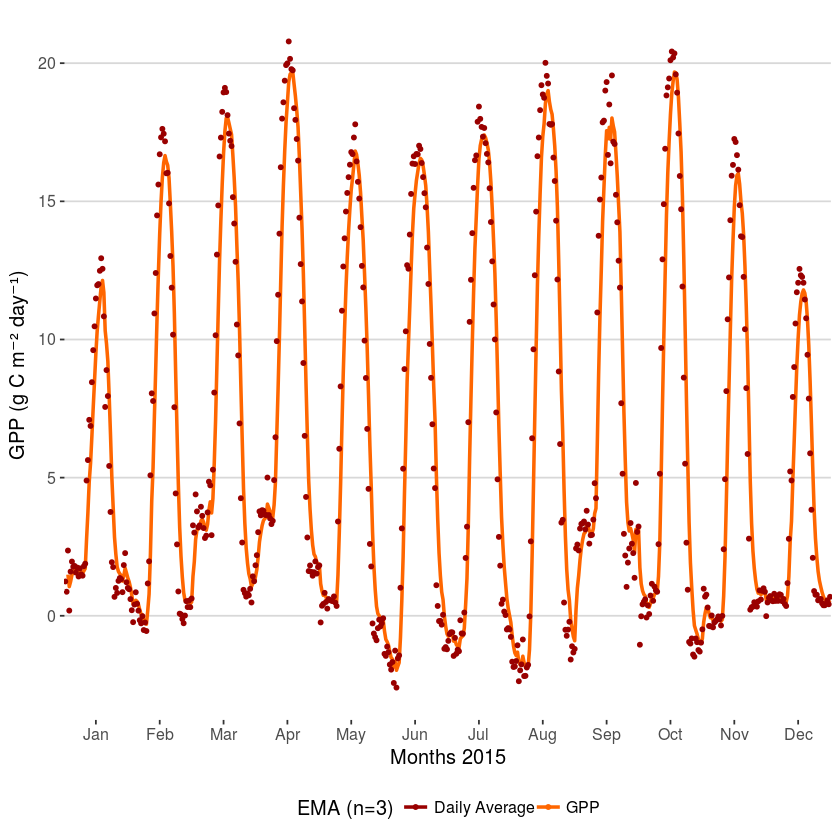

Warning message:
“Removed 2 rows containing missing values (geom_path).”

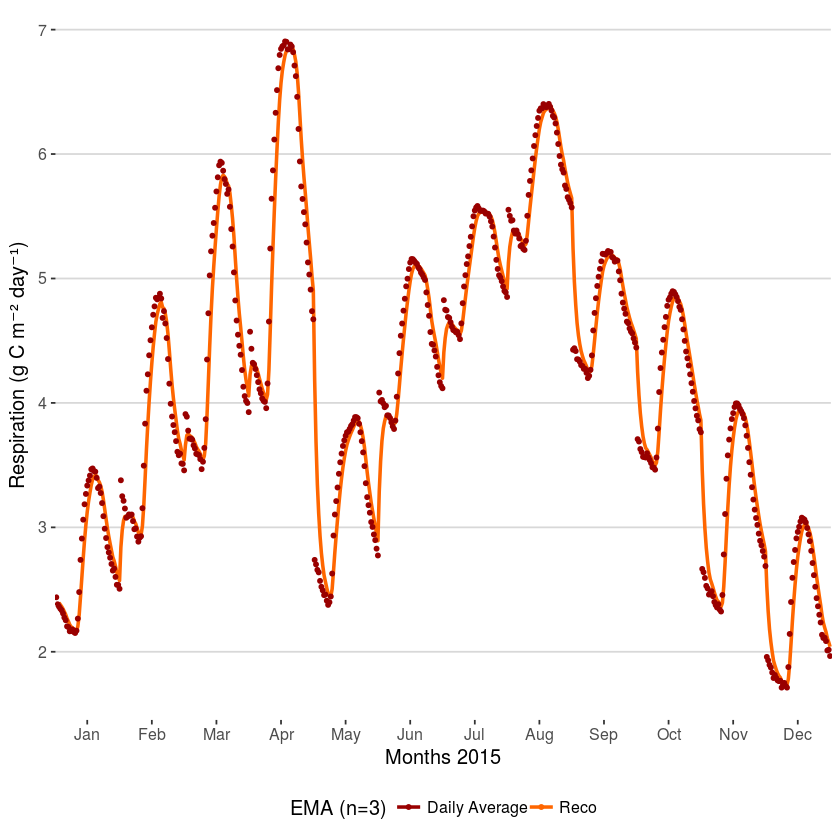

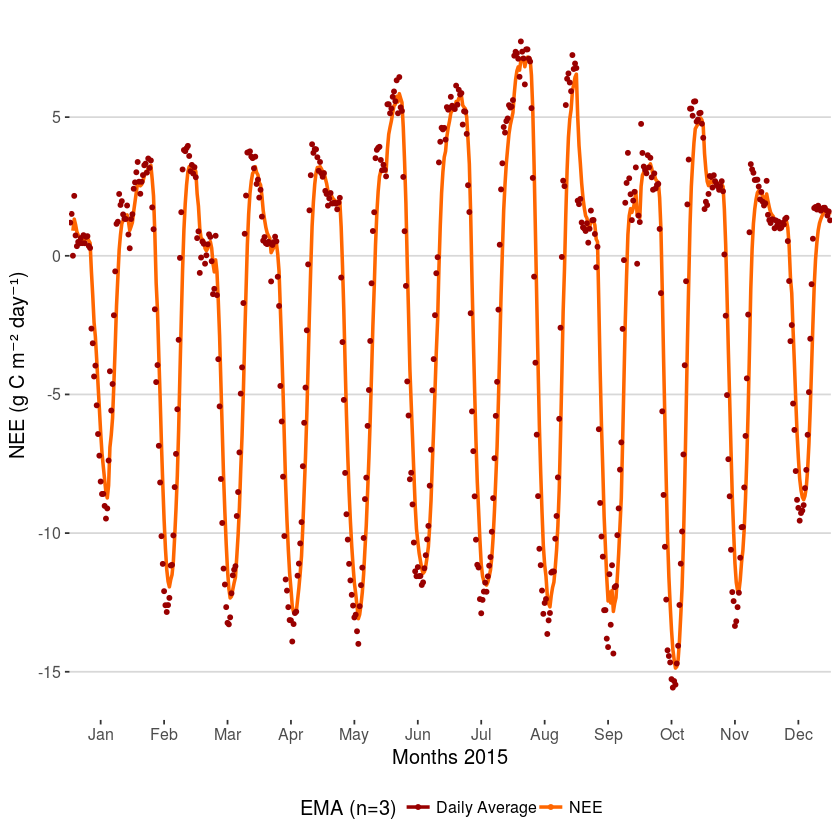

In [88]:
require(TTR)
ppp <- ggplot(fullres, aes(x=factor(ID),group = 1)) + theme_hc() +
       scale_colour_manual(values = c("#990000", "#FF6600"))
  pp1 <- ppp + geom_line(aes(y = EMA(GPP, n=3, ratio=2/(5+1)), colour = "GPP"), size=1) +
         geom_point(aes(y = GPP, colour = "Daily Average"), size=1)
  pp2 <- ppp + geom_line(aes(y = EMA(Reco, n=3, ratio=2/(5+1)), colour = "Reco"), size=1) +
        geom_point(aes(y = Reco, colour = "Daily Average"), size=1)
  pp3 <- ppp + geom_line(aes(y = EMA(NEE, n=3, ratio=2/(5+1)), colour = "NEE"), size=1) +
         geom_point(aes(y = NEE, colour = "Daily Average"), size=1)
       
  # now adding the secondary axis, following the example in the help file ?scale_y_continuous
  # and, very important, reverting the above transformation
  #p <- p + scale_y_continuous(sec.axis = sec_axis(~.*3, name = "Radiation [W m^{-2}]"))
 
  # modifying colours and theme options
  #pp <- pp + scale_colour_manual(values = c("#660000", "#990000", "#FF6600"))
  pp1 <- pp1 + labs(y = "GPP (g C m⁻² day⁻¹)", x = "Months 2015", colour = "EMA (n=3)") +
       scale_x_discrete(breaks=c(24,72,120,168,216,264, 312, 360, 408, 456,504,552), 
                        labels=c("Jan", "Feb", "Mar", "Apr", "May", "Jun", 
                                 "Jul", "Aug", "Sep", "Oct", "Nov", "Dec")) 
  pp2 <- pp2 + labs(y = "Respiration (g C m⁻² day⁻¹)", x = "Months 2015", colour = "EMA (n=3)") +
       scale_x_discrete(breaks=c(24,72,120,168,216,264, 312, 360, 408, 456,504,552), 
                        labels=c("Jan", "Feb", "Mar", "Apr", "May", "Jun", 
                                 "Jul", "Aug", "Sep", "Oct", "Nov", "Dec")) 
  pp3 <- pp3 + labs(y = "NEE (g C m⁻² day⁻¹)", x = "Months 2015", colour = "EMA (n=3)") +
       scale_x_discrete(breaks=c(24,72,120,168,216,264, 312, 360, 408, 456,504,552), 
                        labels=c("Jan", "Feb", "Mar", "Apr", "May", "Jun", 
                                 "Jul", "Aug", "Sep", "Oct", "Nov", "Dec")) 


                     #   xlab("Months 2015") + ylab("Energy Fluxes [W m^{-2}]")
      #  scale_x_datetime(date_format("%Y-%m-%d", tz = "America/Phoenix")) + theme_hc()
         
pp1
pp2
pp3


In [433]:
head(fullres)
tail(fullres)

Hour,DoY,Date,LE,H,Rg,NHour
00:00,16,2015-01-16 00:00:00,1.455789,-5.557045,0.00000000,2018-05-20 00:00:00
00:30,16,2015-01-16 00:30:00,4.130209,-10.105342,0.07516129,2018-05-20 00:30:00
01:00,16,2015-01-16 01:00:00,3.813279,-12.952048,0.03225806,2018-05-20 01:00:00
01:30,16,2015-01-16 01:30:00,10.912977,-22.061581,0.02129032,2018-05-20 01:30:00
02:00,16,2015-01-16 02:00:00,2.010547,-12.025410,0.00000000,2018-05-20 02:00:00
02:30,16,2015-01-16 02:30:00,12.666134,-10.632858,0.01064516,2018-05-20 02:30:00


,Hour,DoY,Date,LE,H,Rg,NHour
571,21:00,350,2015-12-16 21:00:00,8.656033,-34.47161,0.00000000,2018-05-20 21:00:00
572,21:30,350,2015-12-16 21:30:00,7.100950,-32.69640,0.04290323,2018-05-20 21:30:00
573,22:00,350,2015-12-16 22:00:00,8.837094,-30.71897,0.03225806,2018-05-20 22:00:00
574,22:30,350,2015-12-16 22:30:00,6.168810,-28.31871,0.07548387,2018-05-20 22:30:00
575,23:00,350,2015-12-16 23:00:00,5.845917,-24.40964,0.01064516,2018-05-20 23:00:00
576,23:30,350,2015-12-16 23:30:00,6.676820,-18.38593,0.02161290,2018-05-20 23:30:00


Warning message:
“Removed 3 rows containing missing values (geom_point).”

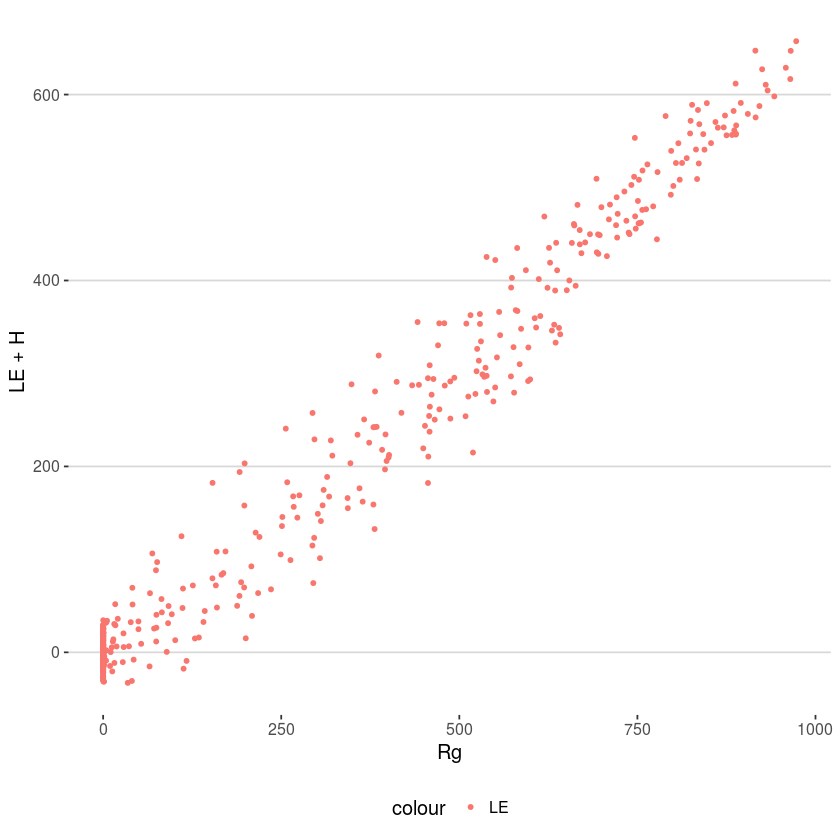

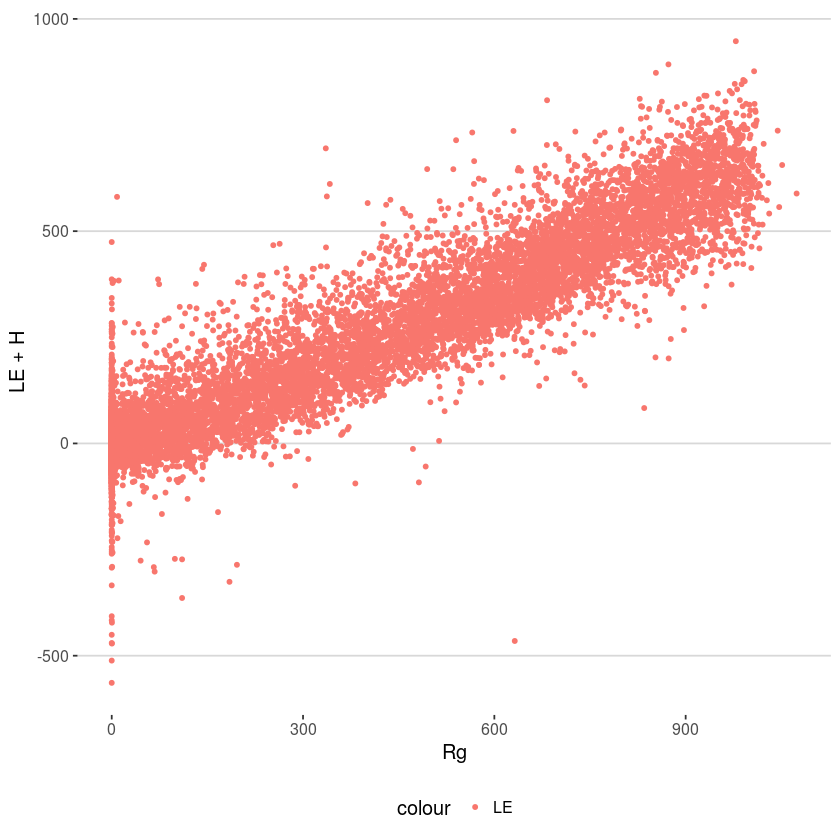

In [43]:
p <- ggplot(fullres, aes(x=Rg)) + theme_hc() 
  p <- p + geom_point(aes(y = LE+H, colour = "LE"), size=1)
  
q <- ggplot(df, aes(x=Rg)) + theme_hc() 
  q <- q + geom_point(aes(y = LE+H, colour = "LE"), size=1)
  
  # now adding the secondary axis, following the example in the help file ?scale_y_continuous
  # and, very important, reverting the above transformation
  #p <- p + scale_y_continuous(sec.axis = sec_axis(~.*3, name = "Radiation [W m^{-2}]"))
 
  # modifying colours and theme options
  #p <- p + scale_colour_manual(values = c("#660000", "#990000", "#FF6600"))
  #p <- p + labs(y = "Energy Flux [W m^{-2}]", x = "Months 2015", colour = "Fluxes") +
       # scale_x_discrete(breaks=c(24,72,120,168,216,264, 312, 360, 408, 456,504,552), 
              #          labels=c("Jan", "Feb", "Mar", "Apr", "May", "Jun", 
            #                     "Jul", "Aug", "Sep", "Oct", "Nov", "Dec")) 
                     #   xlab("Months 2015") + ylab("Energy Fluxes [W m^{-2}]")
      #  scale_x_datetime(date_format("%Y-%m-%d", tz = "America/Phoenix")) + theme_hc()
         
p
q

In [44]:
cor(df,method="pearson")
cor(df[,],method="spearman")

ERROR: Error in cor(df, method = "pearson"): 'x' must be numeric


In [48]:
df$LE_plus_H <- df$LE + df$H
fullres$LE_plus_H <- fullres$LE + fullres$H

In [45]:
str(df)

'data.frame':	17523 obs. of  13 variables:
 $ DoY    : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Date   : POSIXct, format: "2015-01-01 00:30:00" "2015-01-01 01:00:00" ...
 $ Month  : Factor w/ 12 levels "Jan","Feb","Mar",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ NEE    : num  1.65 -0.421 -0.247 -0.247 1.991 ...
 $ LE     : num  61.8 29.3 47.4 41.6 22.1 ...
 $ H      : num  -53.7 -24.6 -35.2 -51.7 -40.1 -36.5 -53.6 -42.4 -53 -43.8 ...
 $ Rg     : num  2.33 0.33 0 0 0 0 0 0 0 0 ...
 $ GPP    : num  0.289 2.253 2.057 1.985 -0.356 ...
 $ GPP_U05: num  -1.473 -0.394 -0.937 -1.184 -0.905 ...
 $ GPP_U50: num  0.153 1.909 1.76 0.286 -0.463 ...
 $ GPP_U95: num  0.353 -0.232 -0.252 -0.317 -0.323 -0.266 -0.317 -0.375 -0.402 -0.444 ...
 $ Hour   : chr  "00:30" "01:00" "01:30" "02:00" ...
 $ NHour  : POSIXct, format: "2018-05-28 00:30:00" "2018-05-28 01:00:00" ...


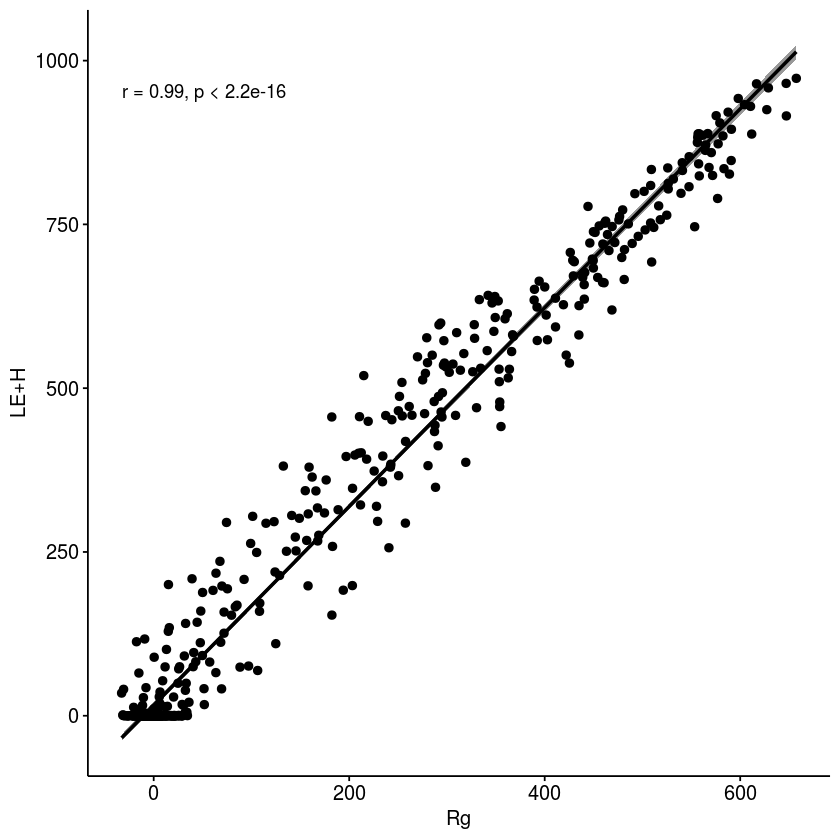

In [49]:
require(ggpubr)
ggscatter(fullres, x = "LE_plus_H", y = "Rg", 
          add = "reg.line", conf.int = TRUE, 
          cor.coef = TRUE, cor.method = "pearson",
          xlab = "Rg", ylab = "LE+H")

Warning message:
“Removed 3 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 3 rows containing non-finite values (stat_cor).”Warning message:
“Removed 3 rows containing missing values (geom_point).”

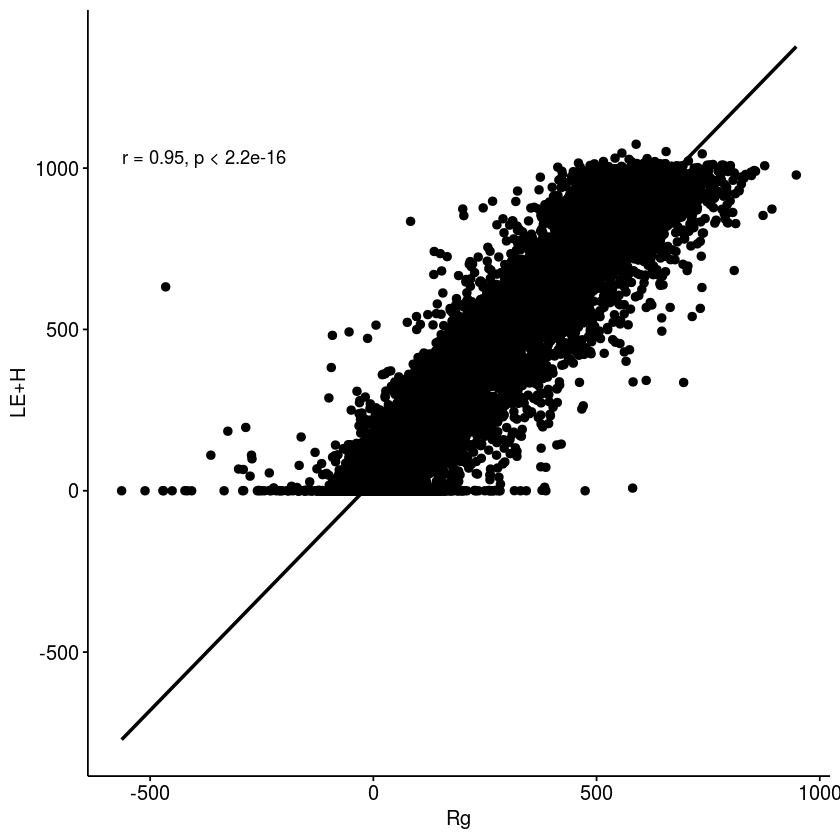

In [65]:
require(ggpubr)
ggscatter(df, x = "LE_plus_H", y = "Rg", 
          add = "reg.line", conf.int = TRUE, 
          cor.coef = TRUE, cor.method = "pearson",
          xlab = "Rg", ylab = "LE+H")

In [67]:
res <- cor.test(df$Rg, df$LE_plus_H, 
                    method = "pearson")
res


	Pearson's product-moment correlation

data:  df$Rg and df$LE_plus_H
t = 408.83, df = 17518, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9499599 0.9527699
sample estimates:
      cor 
0.9513847 


In [55]:
m1<-lm(LE_plus_H~Rg,data=df)
summary(m1)


Call:
lm(formula = LE_plus_H ~ Rg, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-862.62  -29.98   -0.23   24.64  580.71 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -5.167205   0.621593  -8.313   <2e-16 ***
Rg           0.636877   0.001558 408.828   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 65.78 on 17518 degrees of freedom
  (3 observations deleted due to missingness)
Multiple R-squared:  0.9051,	Adjusted R-squared:  0.9051 
F-statistic: 1.671e+05 on 1 and 17518 DF,  p-value: < 2.2e-16


In [56]:
m2<-lm(LE_plus_H~Rg,data=fullres)
summary(m2)


Call:
lm(formula = LE_plus_H ~ Rg, data = fullres)

Residuals:
     Min       1Q   Median       3Q      Max 
-112.300  -11.272    1.662   14.962   90.277 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -6.780998   1.642577  -4.128  4.2e-05 ***
Rg           0.643296   0.004205 152.971  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 31.14 on 574 degrees of freedom
Multiple R-squared:  0.9761,	Adjusted R-squared:  0.976 
F-statistic: 2.34e+04 on 1 and 574 DF,  p-value: < 2.2e-16


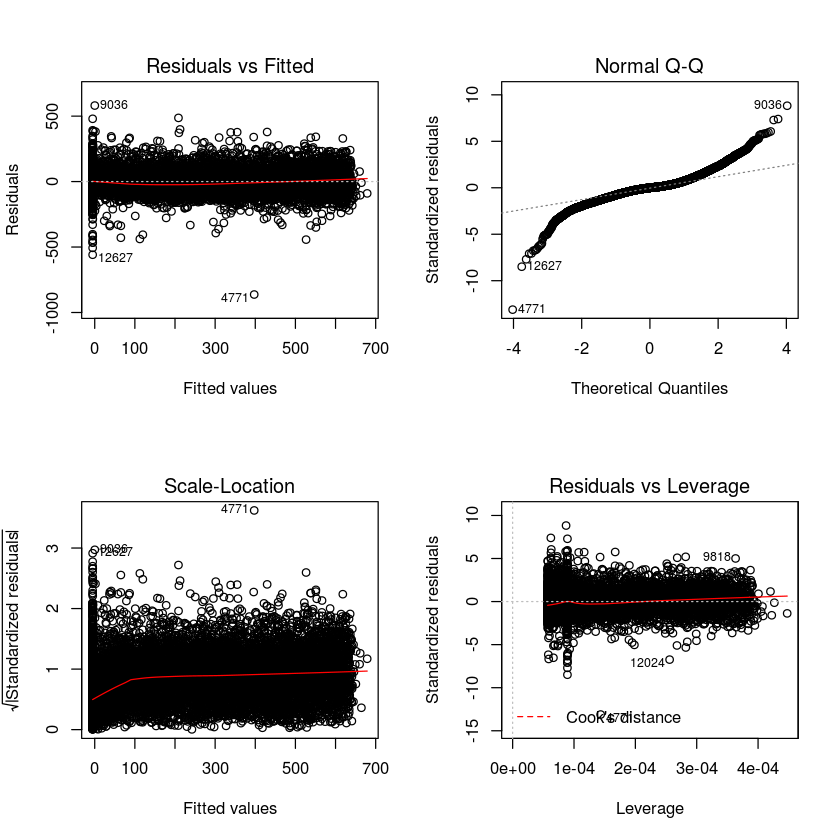

In [69]:
par(mfrow=c(2,2))
plot(m1)

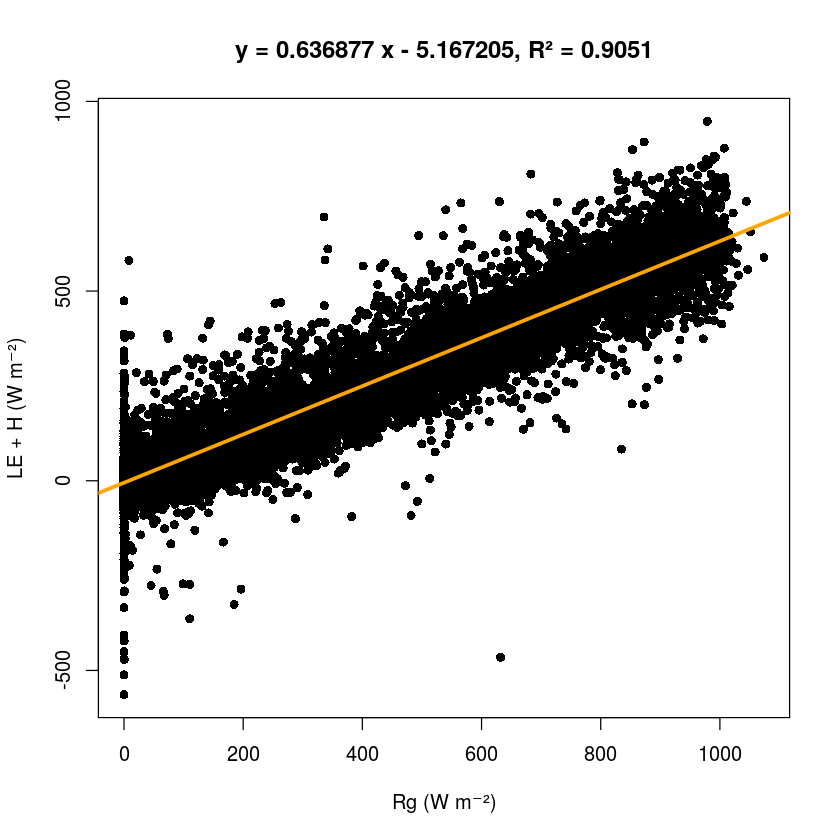

In [62]:
int =  m1$coefficient["(Intercept)"]
slope =m1$coefficient["Rg"]

plot(LE_plus_H ~ Rg,
     data = df,
     pch=16,
     xlab = "Rg (W m⁻²)", 
     ylab = "LE + H (W m⁻²)",
     main= "y = 0.636877 x - 5.167205, R² = 0.9051")

abline(int, slope,
       lty=1, lwd=3, col="orange") 

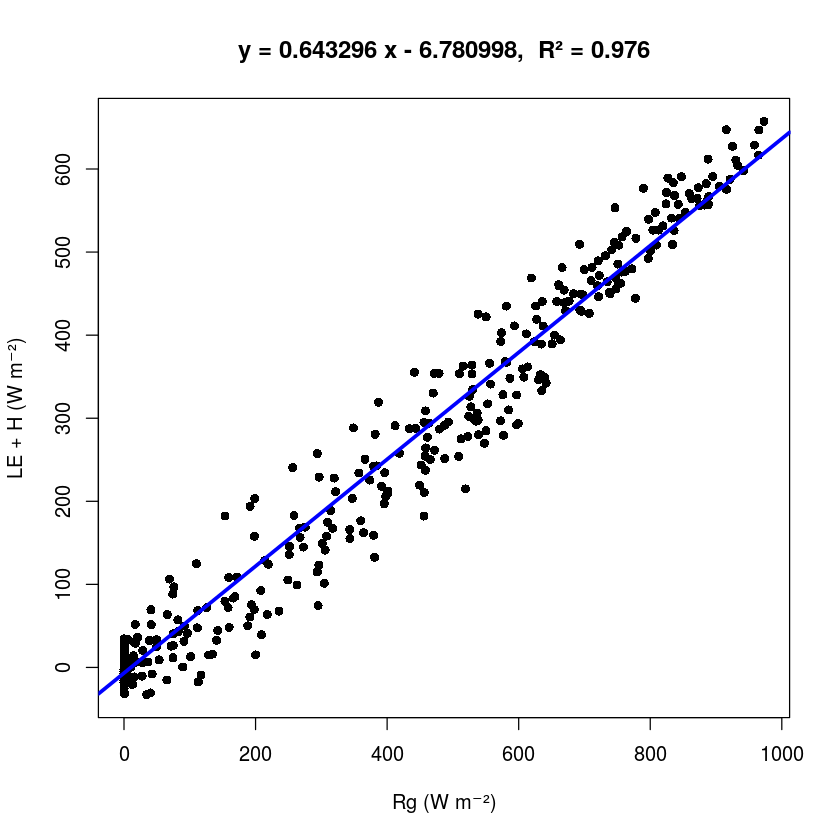

In [61]:
int =  m2$coefficient["(Intercept)"]
slope =m2$coefficient["Rg"]

plot(LE_plus_H ~ Rg,
     data = fullres,
     pch=16,
     xlab = "Rg (W m⁻²)", 
     ylab = "LE + H (W m⁻²)",
     main= "y = 0.643296 x - 6.780998,  R² = 0.976")

abline(int, slope,
       lty=1, lwd=3, col="blue") 

In [79]:
install.packages("TTR")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
